# 12장  다중 분류 문제 해결하기


###  [실습]  아이리스 품종 예측

### 1 |  다중 분류 문제
### 2 |  상관도 그래프
### 3 |  원-핫 인코딩
### 4 |  소프트맥스
### 5 |  아이리스 품종 예측 실행


In [11]:
!pip install tensorflow


  Using cached https://files.pythonhosted.org/packages/6d/7d/488b90f470b96531a3f5788cf12a93332f543dbab13c423a5e7ce96a0493/Markdown-2.6.11-py2.py3-none-any.whl
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\Y.G JI\AppData\Local\pip\Cache\wheels\59\23\a2\6a23b5ce3040b3dbb7ce5c21fa135ddae15c2966bf4a32836c
Successfully built absl-py


You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
!pip install keras

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


---

##  1. 다중분류 문제 

실습 데이터 아이리스 품종 예측 : dataset/iris.csv

- https://github.com/gilbutITbook/006958
- https://raw.githubusercontent.com/gilbutITbook/006958/master/deeplearning/dataset/iris.csv

In [4]:
!wget --no-check-certificate https://raw.githubusercontent.com/gilbutITbook/006958/master/deeplearning/dataset/iris.csv

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2018-08-15 19:27:26--  https://raw.githubusercontent.com/gilbutITbook/006958/master/deeplearning/dataset/iris.csv
Resolving raw.githubusercontent.com... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com|151.101.0.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: `iris.csv'

     0K ....                                                  100% 13.9M=0s

2018-08-15 19:27:26 (13.9 MB/s) - `iris.csv' saved [4551/4551]



In [5]:
! dir 

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9495-1634

 D:\Work_Git\DeepMenia\part04\week3_180817 디렉터리

2018-08-15  오후 07:27    <DIR>          .
2018-08-15  오후 07:27    <DIR>          ..
2018-08-15  오후 07:22    <DIR>          .ipynb_checkpoints
2018-08-15  오후 07:27             2,561 12장_다중분류문제해결하기.ipynb
2018-08-15  오후 07:27             4,551 iris.csv
               2개 파일               7,112 바이트
               3개 디렉터리  39,786,573,824 바이트 남음


- 아이리스는 그 꽃봉오리가 마치 먹물을 머금은 붓과 같다 하여 우리나라에서 ‘붓꽃’이라고 불리우는 아름다운 꽃
- 아이리스는 꽃잎의 모양과 길이에 따라 여러 가지 품종으로 나뉨
- 사진을 보면 품종마다 비슷해 보임
- 과연 딥러닝을 사용하여 이들을 구별해 낼 수 있을까?

![붓꽃이미지](01.jpg)

- UCI 머신러닝 저장소에서 아이리스 품종 예측 데이터를 제공하지만, github에서 다운로드함.

- 데이터의 구조는 다음과 같음

![iris](02.jpg)
- 아이리스 데이터의 샘플, 속성, 클래스 구분


![iris](03.jpg)
- 속성을 보니 우리가 앞서 다루었던 것과 중요한 차이가 있음
- 바로 클래스가 2개가 아니라 3개
- 즉, 참(1)과 거짓(0)으로 해결하는 것이 아니라, 여러 개 중에 어떤 것이 답인지를 예측하는 문제


- 이렇게 여러 개의 답 중 하나를 고르는 분류 문제를 다중 분류(multi classification) 라고 함
- 다중 분류 문제는 둘 중에 하나를 고르는 이항 분류(binary classification)와는 접근 방식이 조금 다름
- 지금부터 아이리스 품종을 예측하 는 실습을 통해 다중 분류 문제를 해결해 보자 



---

##  2. 상관도 그래프 

먼저 데이터의 일부를 불러와 내용을 보자


In [7]:
import pandas as pd
df = pd.read_csv('iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


pairplot() 함수를 써서 데이터 전체를 한번에 보는 그래프를 다음과 같이 출력

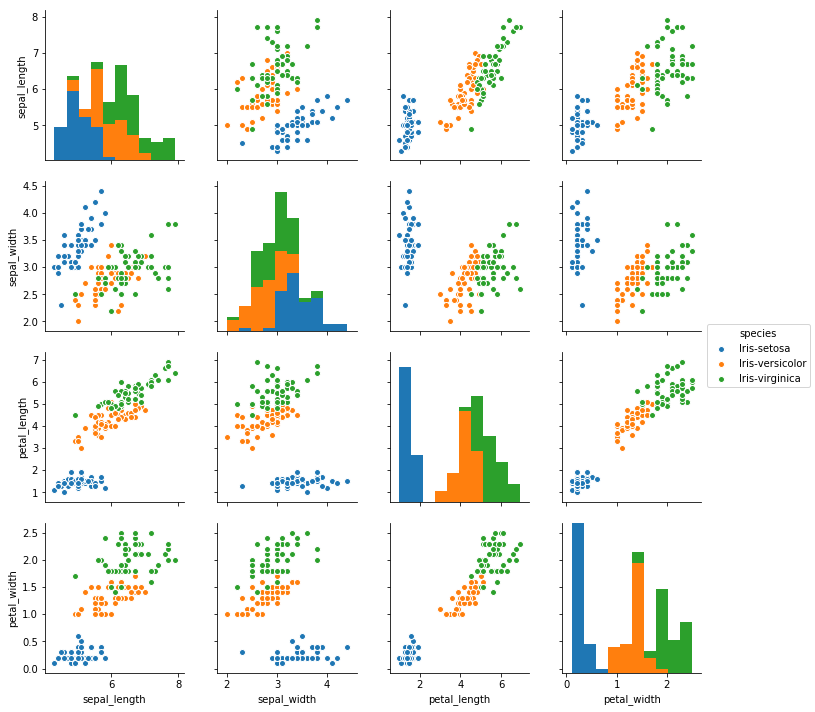

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species');
plt.show()

- 그래프를 보니, 사진으로 볼 때는 비슷해 보이던 꽃잎과 꽃받침의 크기와 넓이가 품종별로 차이가 있음을 알 수 있음
- 이렇게 속성별로 어떤 연관이 있는지를 보여 주는 상관도 그래프를 통해 프로젝트의 감을 잡고 프로그램 전략을 세울 수 있음


---

## 3.  원-핫 인코딩


- 이제 케라스를 이용해 아이리스의 품종을 예측해 보자
- Iris-setosa, Iris-virginica 등 데이터 안에 문자열이 포함되어 있음
- 이럴 땐 numpy보다는 panda로 데이터를 불러와 X와 Y 값을 구분하는 것이 좋음

In [21]:
df = pd.read_csv('iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]
print(Y_obj[ 1:10 ])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


- Y 값이 이번에는 숫자가 아니라 문자열
- 문자열을 숫자로 바꿔 주려면 클래스 이름을 숫자 형태로 바꿔 주어야 함
- 이를 가능하게 하는 함수가 sklearn 라이브러리의 LabelEncoder()

In [15]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

- 이렇게 하면 array(['Iris-setosa', 'Iris-versicolor','Iris-virginica'])가 array([1,2,3])로 바뀜

- 활성화 함수를 적용하려면 Y 값이 숫자 0과 1로 이루어져 있어야 함
- 이 조건을 만족시키려면 keras.util의 np_utils.categorical() 함수를 적용해야 함
- 이에 따라 Y 값의 형태는 다음과 같이 변형됨



In [22]:
from keras.utils import np_utils

Y_encoded = np_utils.to_categorical(Y)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
Y_encoded[ : 10 ]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [27]:
Y_encoded[ -10 : ]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

- 이렇게 하면 array([1,2,3])가 다시 array([[1., 0., 0.], [0., 1., 0.],[0., 0., 1.]])로 바뀜
- 이처럼 여러 개의 Y 값을 0과 1로만 이루어진 형태로 바꿔 주는 기법을 **원-핫 인코딩(one-hot-encoding)** 이라고 함


---

## 4. 소프트맥스


이제 모델을 만들어 보자

> model = Sequential()

> model.add(Dense(16, input_dim=4, activation='relu'))

> model.add(Dense(3, activation='softmax'))

- 여기서 달라진 점이 있음
- 먼저 최종 출력 값이 3개 중 하나여야 하므로 출력층에 해당하는 Dense의 노드수를 3으로 설정함
- 또한, 활성화 함수로 앞서 나오지 않았던 소프트맥스(softmax)를 사용해 보자


- 소프트맥스는 그림 12-3에서와 같이 총합이 1인 형태로 바꿔서 계산해 주는 함수
- 합계가 1인 형태로 변환하면 큰 값이 두드러지게 나타나고 작은 값은 더 작아짐
- 이 값이 교차 엔트로피를 지나 [1., 0., 0.]으로 변화하게 되면 우리가 원하는 원-핫 인코딩 값, 즉 하나만 1이고 나머지는 모두 0인 형태로 전환시킬 수 있음
![붓꽃이미지](04.jpg)

- 이제 다중 분류에 적절한 오차 함수인 categorical_crossentropy를 사용하고, 최적화 함수로 adam을 사용해 보자
- 전체 샘플이 50회 반복될 때까지 실험을 진행하되 한 번에 입력되는 값은 1개 종합하면 다음과 같은 프로그램이 완성됨


---

## 5.아이리스 품종 예측 실행

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [32]:
# 데이터 입력
#df = pd.read_csv('iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# 그래프로 확인
#sns.pairplot(df, hue='species');
#plt.show()

# 데이터 분류
#dataset = df.values
#X = dataset[:,0:4].astype(float)
#Y_obj = dataset[:,4]

# 문자열을 숫자로 변환
#e = LabelEncoder()
#e.fit(Y_obj)
#Y = e.transform(Y_obj)
#Y_encoded = np_utils.to_categorical(Y)


In [33]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 0s 3ms/step - loss: 1.6267 - acc: 0.3267
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 1.1399 - acc: 0.4867
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.9403 - acc: 0.4600
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7889 - acc: 0.7467
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6662 - acc: 0.7267
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5631 - acc: 0.8800
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5078 - acc: 0.8267
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4555 - acc: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4285 - acc: 0.8867
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4068 - acc: 0.8867
Epoch 11/50
150/150 [============================

- 예측 정확도가 97.33%로 측정됨
- 이는 150개의 샘플을 한 번씩 테스트한 결과 146개의 품종을 정확히 맞추는 확률